In [110]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
root_path = 'C://Users//HP//projects//DiplomaThesis'
sys.path.append(f'{root_path}')

from empyrical.stats import cum_returns 

import figures
import backtest

%load_ext autoreload 
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from data import Meta
meta = Meta()
meta.load()

# Performance (Ensembles)

In [64]:
r = figures.Results(os.path.join("results", "selected", "ensembles"))
r.load(suffix="", SORTING=figures.SORTING_OLD)
figures.tabulate_performance(r.pe, r.ar, NN_DICT=figures.NN_DICT_OLD)

C:\Users\HP\projects\DiplomaThesis\figures.py:238: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.columns = ["R Square", "Mean Squared Error", "Mean Absolute Error", "Root Mean Squared Error"]


,LR,NN1,NN2,NN3,NN4,NN5
R Square,0.09,0.30,-0.32,-1.22,0.21,0.48
Mean Squared Error,1.88,2.10,2.20,2.22,2.12,2.38
Mean Absolute Error,7.86,7.85,7.90,7.94,7.76,7.82
Root Mean Squared Error,13.63,13.62,13.66,13.71,13.67,13.61


# Backtest

In [99]:
figures.tabulate_backtest_descriptives_ls('models/selected/ensembles','32')

,0.5-0.5,1-1,5-5,10-10,20-20
Mean,0.075,0.064,0.031,0.021,0.014
Mean (Yearly),1.227,1.046,0.442,0.280,0.180
Standard Deviation,0.129,0.091,0.046,0.032,0.024
Sharpe Ratio,2.007,2.437,2.365,2.296,2.062
Skewness,0.978,1.623,1.968,2.036,2.223
Kurtosis,0.766,4.067,6.356,6.517,7.537
Max Drawdown,-0.267,-0.107,-0.059,-0.031,-0.026


In [100]:
backtest.get_nfirms_in_portfolios()

{'0.5': 23, '1': 47, '5': 238, '10': 477, '20': 956}

In [112]:
figures.tabulate_backtest_descriptives_models("models/selected/ensembles", 
                                    HIDDEN_LAYERS=backtest.HIDDEN_LAYERS_OLD, NN_DICT=backtest.NN_DICT_OLD)

,LR,NN1,NN2,NN3,NN4,NN5
Mean,0.014038,0.021103,0.020753,0.018828,0.020038,0.020733
Mean (Yearly),0.175217,0.280051,0.283677,0.252980,0.269698,0.276849
Standard Deviation,0.037899,0.031837,0.036394,0.036536,0.025152,0.028798
Sharpe Ratio,1.283151,2.296140,1.975306,1.785159,2.759786,2.493945
Skewness,2.165706,2.035922,-0.402503,0.871196,0.856405,0.573297
Kurtosis,8.663471,6.517091,1.034071,1.214907,1.150323,1.942983
Max Drawdown,-0.098010,-0.031313,-0.170360,-0.091567,-0.037070,-0.103112


C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


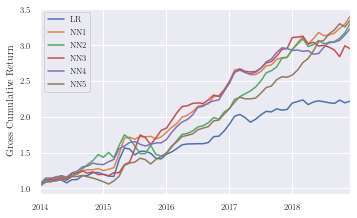

In [113]:
figures.plot_backtest_cumreturns_models("models/selected/ensembles", 
                                            HIDDEN_LAYERS=backtest.HIDDEN_LAYERS_OLD, NN_DICT=backtest.NN_DICT_OLD)

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


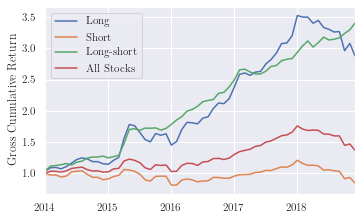

In [111]:
figures.plot_backtest_cumreturns_ls(path_to_backtests="models/selected/ensembles", 
                                            hidden_layers="32")

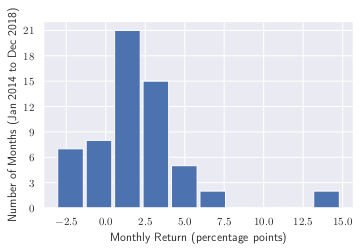

In [119]:
figures.plot_backtest_histogram(path_to_backtests="models/selected/ensembles", hidden_layers="32")

# Ensembles

C:\Users\HP\projects\DiplomaThesis\figures.py:607: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\HP\projects\DiplomaThesis\figures.py:607: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\HP\projects\DiplomaThesis\figures.py:607: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\HP\projects\DiplomaThesis\figures.py:607: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\HP\projects\DiplomaThesis\figures.py:607: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\HP\projects\DiplomaThesis\figures.py:607: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show(

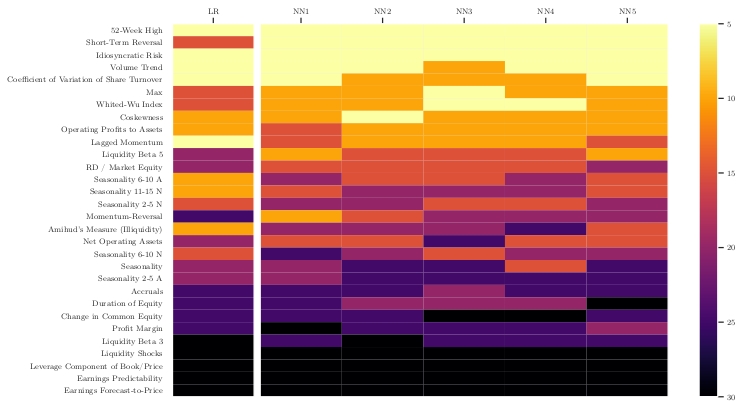

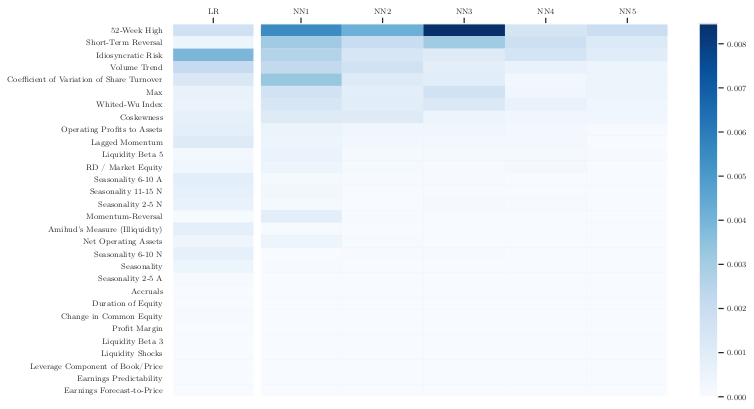

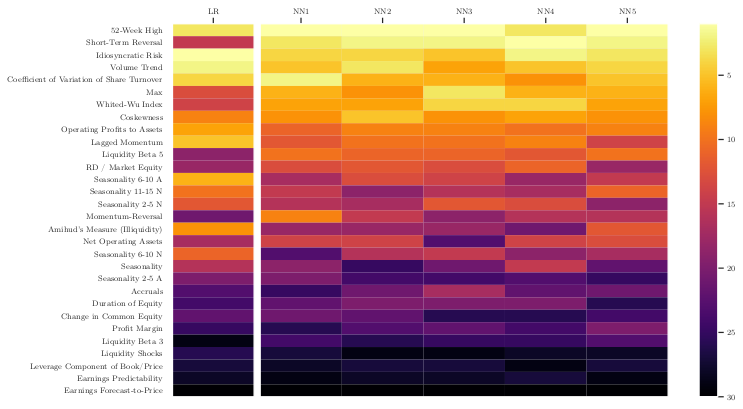

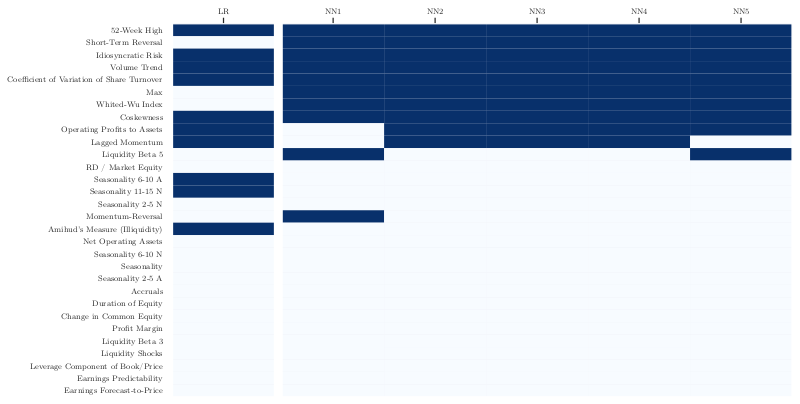

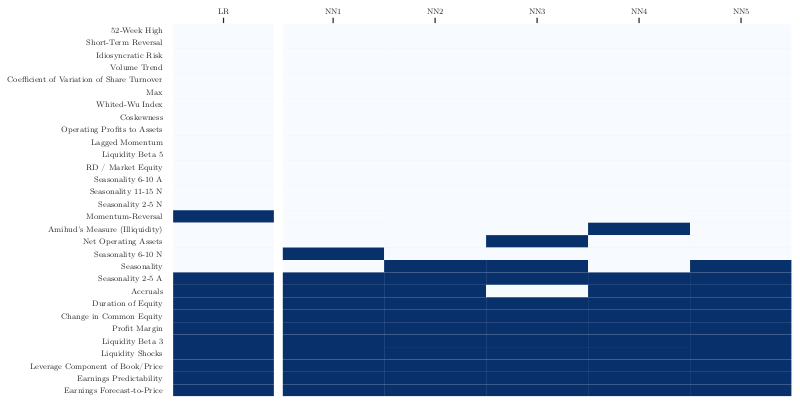

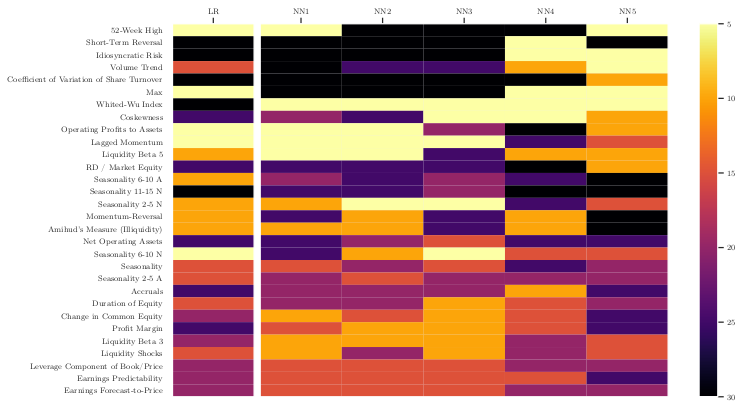

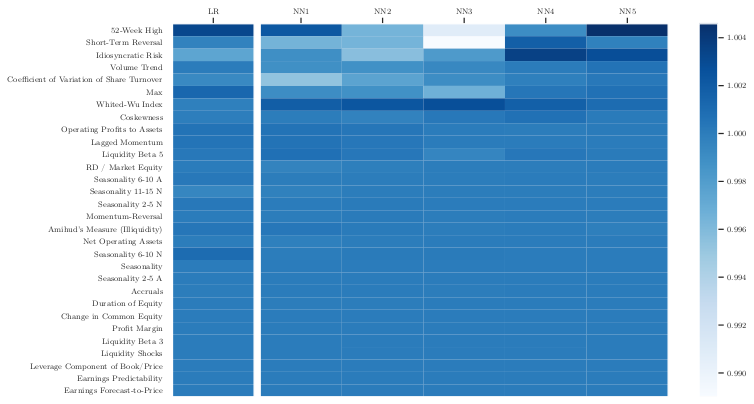

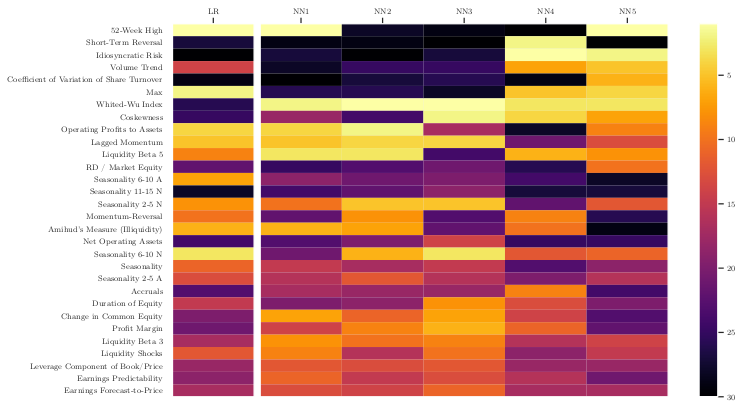

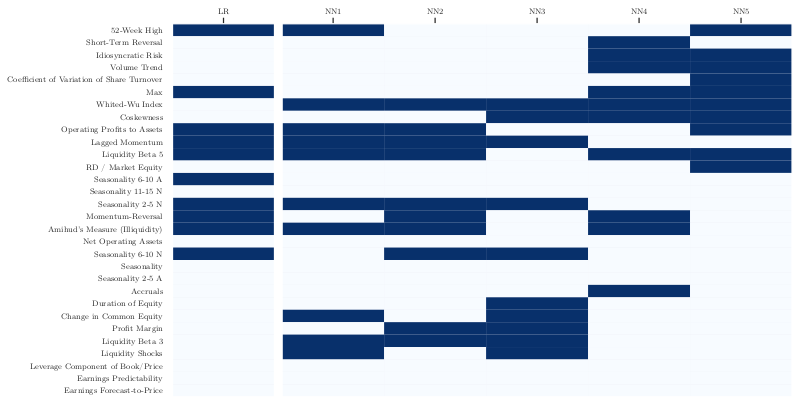

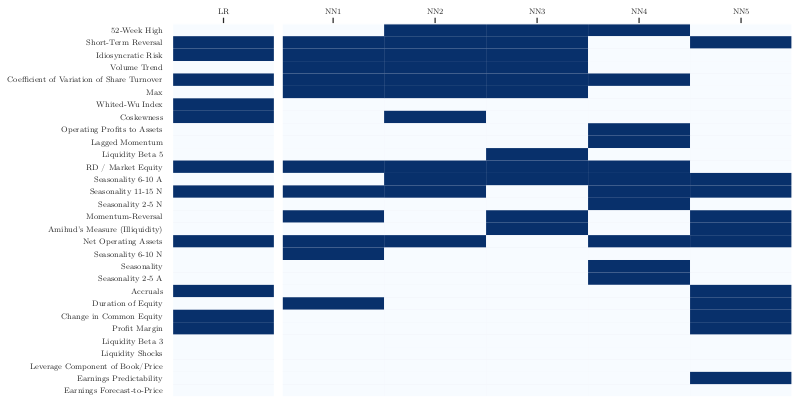

In [133]:
r = figures.Results(os.path.join("results", "selected", "ensembles"))
r.load(suffix="", SORTING=figures.SORTING_OLD, NN_DICT=figures.NN_DICT_OLD)
r.subset('ytrain',16)
r.rename(['nn_name'])

for styling in ["heatmap", "blues", "order", "top", "bottom"]: 
    figures.style_plot_df(r.ig.transpose(), styling=styling, mode='ensemble', NN_NAMES=figures.NN_NAMES_OLD)

for styling in ["heatmap", "blues", "order", "top", "bottom"]: 
    figures.style_plot_df(r.mr.transpose(), styling=styling, mode='ensemble', NN_NAMES=figures.NN_NAMES_OLD)

In [127]:
%matplotlib inline

C:\Users\HP\projects\DiplomaThesis\figures.py:607: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


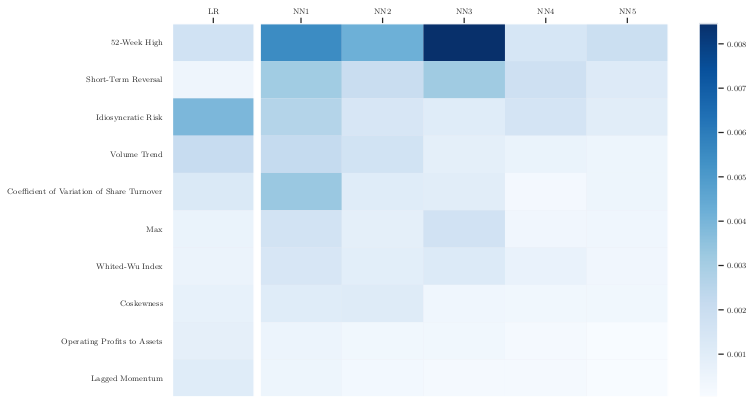

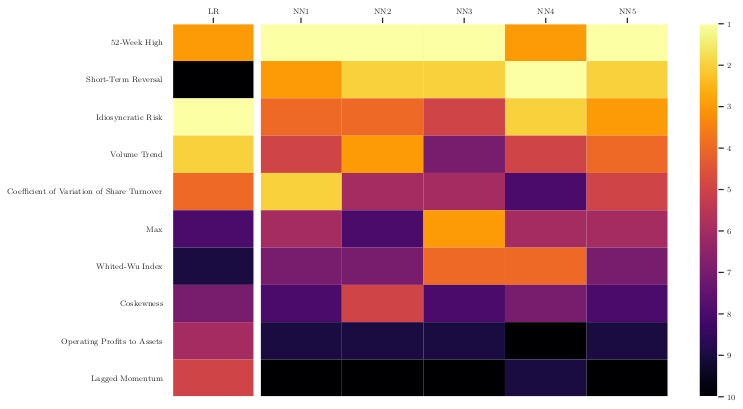

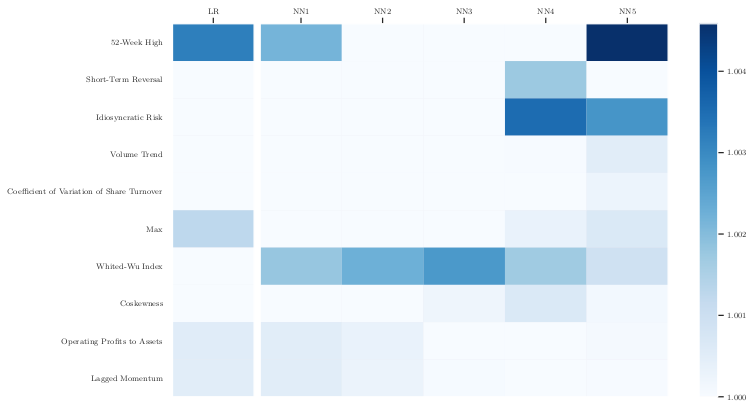

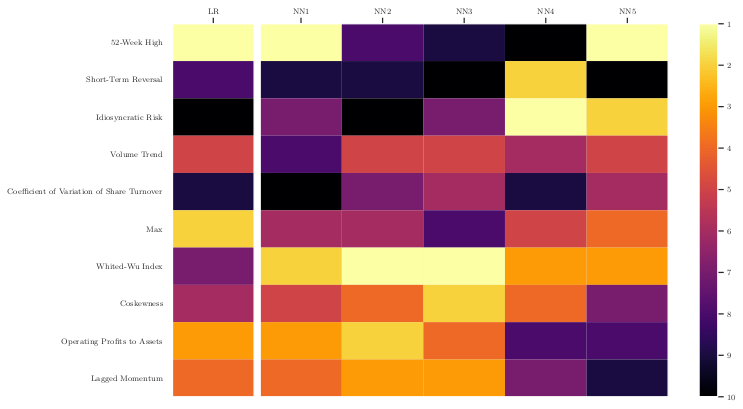

In [134]:
r = figures.Results(os.path.join("results", "selected", "ensembles"))
r.load(suffix="", SORTING=figures.SORTING_OLD, NN_DICT=figures.NN_DICT_OLD)
r.subset('ytrain',16)
r.rename(['nn_name'])

for styling in ["blues", "order"]: 
    figures.style_plot_df(r.ig.transpose().head(10), styling=styling, mode='ensemble', NN_NAMES=figures.NN_NAMES_OLD)

for styling in ["blues", "order"]: 
    figures.style_plot_df(r.mr.transpose().head(10), styling=styling, mode='ensemble', NN_NAMES=figures.NN_NAMES_OLD, vmin=1)

# Robustness of ensembles in time

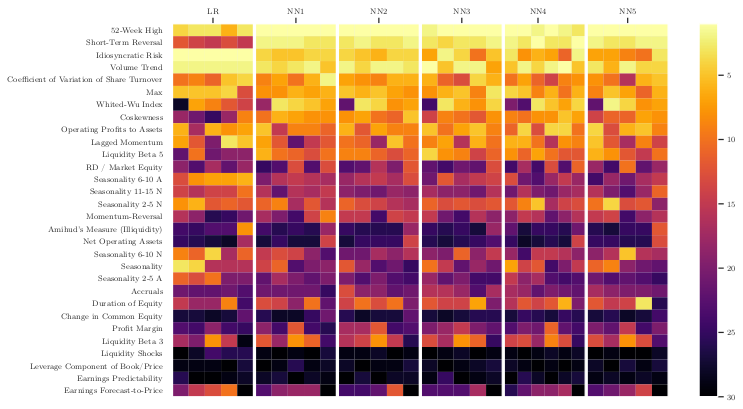

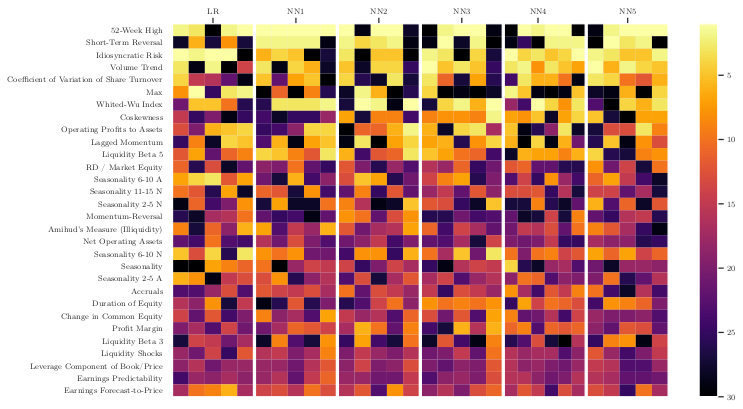

In [136]:
r = figures.Results(os.path.join("results", "selected", "ensembles"))
r.load(suffix="", SORTING=figures.SORTING_OLD, NN_DICT=figures.NN_DICT_OLD)
r.rename(['nn_name', "ytrain"])

for styling in ["order"]: 
    figures.style_plot_df(r.ig.transpose(), styling=styling, mode='ensemble_time', NN_NAMES=figures.NN_NAMES_OLD)

for styling in ["order"]: 
    figures.style_plot_df(r.mr.transpose(), styling=styling, mode='ensemble_time', NN_NAMES=figures.NN_NAMES_OLD)

# Seeds

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:476: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:476: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


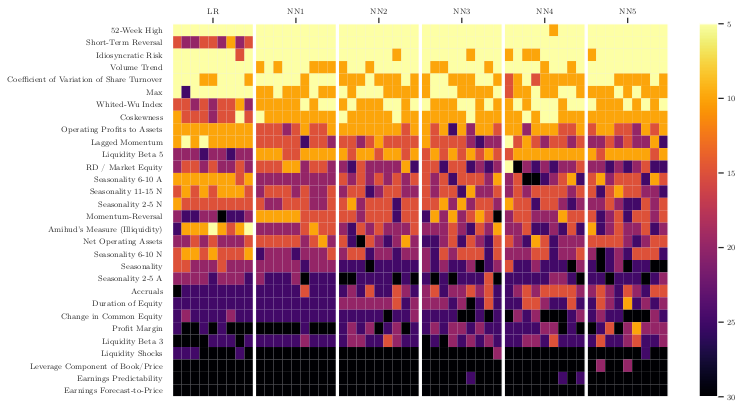

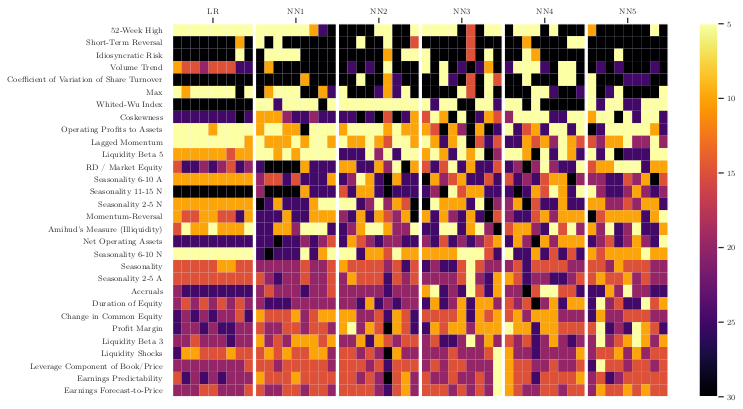

In [93]:
r = figures.Results(os.path.join("results", "selected", "individual"))
r.load(suffix="", SORTING=figures.SORTING_OLD, NN_DICT=figures.NN_DICT_OLD)
r.subset('ytrain',16)
r.rename(['nn_name', "seed"])

for styling in ["heatmap"]: 
    figures.style_plot_df(r.ig.transpose(), styling=styling, mode='seeds', NN_NAMES=figures.NN_NAMES_OLD)

for styling in ["heatmap"]: 
    figures.style_plot_df(r.mr.transpose(), styling=styling, mode='seeds', NN_NAMES=figures.NN_NAMES_OLD)

# Ensembles - simulations

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


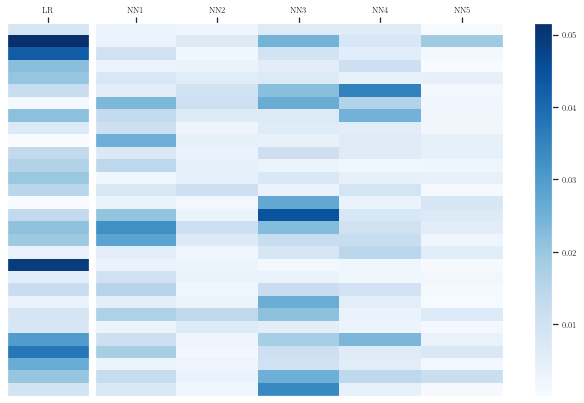

In [198]:
r = figures.Results(os.path.join("results", "simulated", "ensembles"))
r.load(sort_features=False, NN_DICT=figures.NN_DICT)
r.subset('ytrain',16)
r.rename(['nn_name'])

for styling in ["blues"]: 
    figures.style_plot_df(r.ig.transpose(), styling=styling, mode='ensemble', NN_NAMES=figures.NN_NAMES_OLD)
    #style_plot_df(r.mr.transpose(), styling=styling, mode='ensemble')

# Seeds - simulations

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


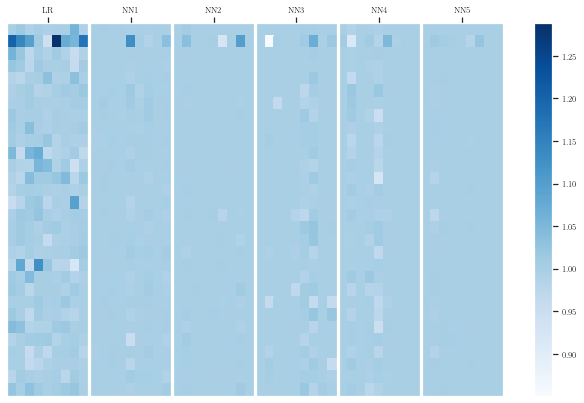

In [155]:
r = Results(os.path.join("results", "simulated", "individual"))
r.load(sort_features=False, suffix="_train")
r.subset('ytrain',16)
r.rename(['nn_name', "seed"])

for styling in ["blues"]: 
    #style_plot_df(r.ig.transpose(), styling=styling, mode='seeds')
    style_plot_df(r.mr.transpose(), styling=styling, mode='seeds')

# Local Integrated Gradients

In [95]:
lig = figures.LocalIG("models/selected/ensembles")

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:284: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


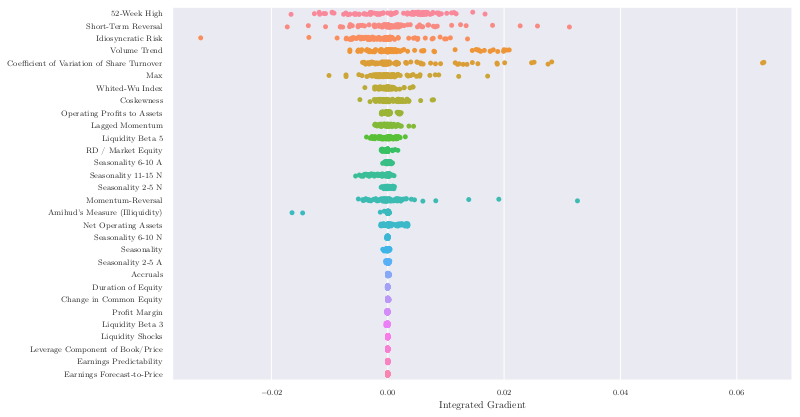

In [97]:
lig.load('y=16,y=12,y=1,hl=32,nm=9,o=adam', suffix="", SORTING=figures.SORTING_OLD)
lig.plot()

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:284: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


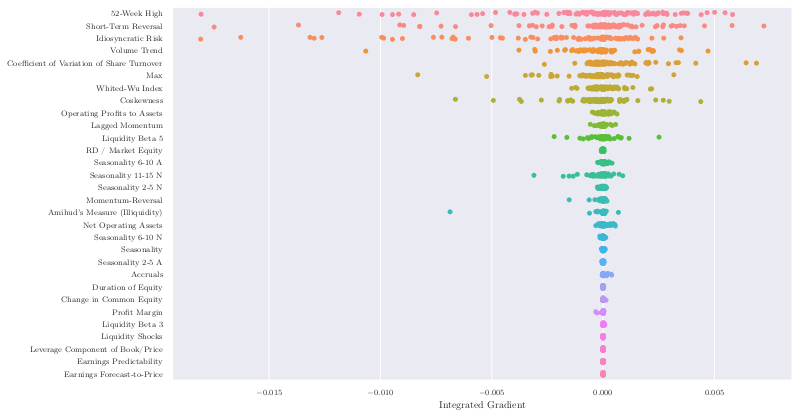

In [98]:
lig.load('y=16,y=12,y=1,hl=32,16,8,4,2,nm=9,o=adam', suffix="", SORTING=figures.SORTING_OLD)
lig.plot()

# Local Integrated Gradients (Simulated)

In [257]:
lig = LocalIG("models/simulated/ensembles")

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:79: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


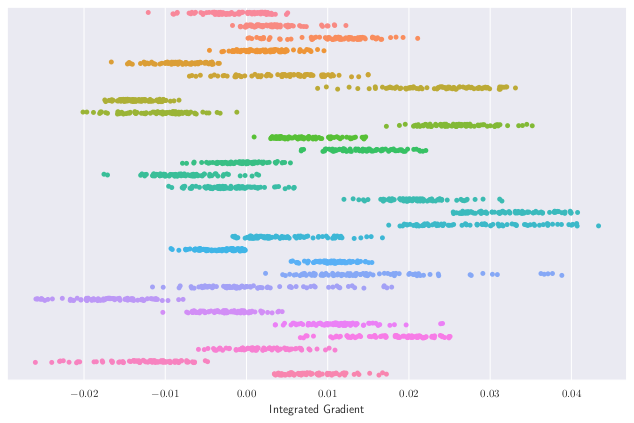

In [264]:
lig.load('y=16,y=12,y=1,hl=32,nm=9,o=adam', sort_features=False)
lig.plot()

### Why is MR and IG so different? 
IG is high for features whose **values** have big impact on the **value** of the prediction, if other features are at 0. (It **ignores the correlation** of the features.)

MR is high for features whose **distortion** worsens the **error** of the prediction relative to truth. It **takes into account the correlation** of the features.

The issue is the mirror of that in linear regression, coefficients of a variable (IG) can be big and yet the variable can be insignificant due to multicollinearity and a lot more features present (MR)

### MR and IG agree the more the deeper the model

In [15]:
from utils import get_orders
ar, mr, ig, pe = r.ar, r.mr, r.ig, r.pe
def compare_mr_ig(hidden_layers):
    df_mr = (mr.apply(lambda x: get_orders(x), axis=1)>=20)
    df_mr = name(
            ar, 
            subset_models(
                ar, df_mr, hidden_layers=hidden_layers, ytrain=16
            ).transpose(),
            ["nn_name"])
    df_ig = (ig.apply(lambda x: get_orders(x), axis=1)>=20)
    df_ig = name(
            ar, 
            subset_models(
                ar, df_ig, hidden_layers=hidden_layers, ytrain=16
            ).transpose(),
            ["nn_name"])
    df = pd.concat([df_ig,df_mr,],axis=1)
    df.columns = ["IG", "MR"]
    return df

overlap_top_10 = dict()
for hl in ["32","32,16","32,16,8", "32,16,8,4", "32,16,8,4,2"]:
    df = compare_mr_ig(hl)
    overlap_top_10[hl] = ((df.IG == True) & (df.MR == True)).sum()
print("overlap top 10 features:")
print(overlap_top_10)

plot_df_simple(
    compare_mr_ig("32"),
    cmap=plt.cm.Blues,
    show_cbar=False
)

plot_df_simple(
    compare_mr_ig("32,16,8,4,2"),
    cmap=plt.cm.Blues,
    vmin=0,
    show_cbar=False
)

NameError: name 'name' is not defined